In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pip install wordcloud

In [ ]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset/Faith/translateFaith.csv")
dataset

,Review,Review_English
0,keren tie dye nya,cool tie dye
1,ukur pas,measure fit
2,ga lolos qc dikit ga ngaruh d akhir gue cuttin...,ga escape qc little ga influence d end gue cut...
3,cakep abis buat fams sejak lahir wajib punya ...,cute abis for fams since birth must have roar...
4,kualitas bagus tidak kecewa,good quality not disappointed
...,...,...
357,ukur pas berat badan 71 - 80 kg puas banget ti...,measure fit weight 71 - 80 kg very satisfied j...
358,ukur pas,measure fit
359,mantep dah poko,mantep dah poko
360,ukur pas tinggi badan 160 - 170 cm berat badan...,fit measure height 160 - 170 cm body weight 6...


In [ ]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [ ]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [ ]:
dataset['Review'] = dataset['Review'].astype(str)
dataset['Review_English'] = dataset['Review_English'].astype(str)

In [ ]:
dataset["Review_English"] = dataset["Review_English"].apply(lambda Text: Text_Cleaning(Text))
dataset["Review_English"] = dataset["Review_English"].apply(lambda Text: Text_Processing(Text))

In [ ]:
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen dari sebuah kata
def get_sentiment(word):
    analysis = TextBlob(word)
    if analysis.sentiment.polarity > 0:
        return "Positif"
    elif analysis.sentiment.polarity == 0:
        return "Netral"
    elif analysis.sentiment.polarity < 0:
        return "Negatif"

# Mengambil review dari dataset
data_review = list(dataset['Review_English'])

# List untuk menyimpan hasil klasifikasi sentimen kata
hasil_sentimen = []

# Iterasi setiap review
for review in data_review:
    kata_review = TextBlob(review).words
    sentimen_review = []

    # Iterasi setiap kata dalam review
    for kata in kata_review:
        sentimen_kata = get_sentiment(kata)
        sentimen_review.append(sentimen_kata)

    hasil_sentimen.append(sentimen_review)

# Menambahkan kolom baru ke dataset
dataset['Sentimen_Kata'] = hasil_sentimen

In [ ]:
from textblob import TextBlob

data_review = list(dataset['Review_English'])
kata_negatif = set()
kata_netral = set()
kata_positif = set()

for review in data_review:
    analysis = TextBlob(review)
    kata_review = analysis.words
    for kata in kata_review:
        kata_analysis = TextBlob(kata)
        if kata_analysis.sentiment.polarity < 0:
            kata_negatif.add(kata)
        elif kata_analysis.sentiment.polarity == 0:
            kata_netral.add(kata)
        else:
            kata_positif.add(kata)

# Convert sets to lists
kata_negatif = list(kata_negatif)
kata_netral = list(kata_netral)
kata_positif = list(kata_positif)

# Find the maximum length of the lists
max_length = max(len(kata_negatif), len(kata_netral), len(kata_positif))

# Pad shorter lists with None
kata_negatif += [None] * (max_length - len(kata_negatif))
kata_netral += [None] * (max_length - len(kata_netral))
kata_positif += [None] * (max_length - len(kata_positif))

# Create a DataFrame
df = pd.DataFrame({
    'Kata Positif': kata_positif,
    'Kata Netral': kata_netral,
    'Kata Negatif': kata_negatif
})

# Display the DataFrame
df

# Export DataFrame to Excel
file_path = 'sentiment_words.xlsx'
df.to_excel(file_path, index=False)

In [ ]:
dataset

,Review,Review_English,Sentimen_Kata
0,keren tie dye nya,cool tie dye,"[Positif, Netral, Netral]"
1,ukur pas,measure fit,"[Netral, Positif]"
2,ga lolos qc dikit ga ngaruh d akhir gue cuttin...,ga escape qc little ga influence end gue cutti...,"[Netral, Netral, Netral, Negatif, Netral, Netr..."
3,cakep abis buat fams sejak lahir wajib punya ...,cute abis fams since birth must roarrrrr,"[Positif, Netral, Netral, Netral, Netral, Netr..."
4,kualitas bagus tidak kecewa,good quality not disappointed,"[Positif, Netral, Netral, Negatif]"
...,...,...,...
357,ukur pas berat badan 71 - 80 kg puas banget ti...,measure fit weight kg satisfied wait reina nyampe,"[Netral, Positif, Netral, Netral, Positif, Net..."
358,ukur pas,measure fit,"[Netral, Positif]"
359,mantep dah poko,mantep dah poko,"[Netral, Netral, Netral]"
360,ukur pas tinggi badan 160 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr..."


In [ ]:
import pandas as pd
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen dari sebuah kata
def get_sentiment(word):
    analysis = TextBlob(word)
    if analysis.sentiment.polarity > 0:
        return "Positif"
    elif analysis.sentiment.polarity == 0:
        return "Netral"
    elif analysis.sentiment.polarity < 0:
        return "Negatif"

# Fungsi untuk mengekstrak kata-kata sesuai sentimen dari review
def extract_sentiment_words(review, sentiment):
    kata_review = TextBlob(review).words
    kata_sentimen = [kata for kata in kata_review if get_sentiment(kata) == sentiment]
    return kata_sentimen

# Menambahkan kolom baru untuk kata-kata positif
dataset['Kata_Positif'] = dataset['Review_English'].apply(lambda x: extract_sentiment_words(x, "Positif"))

# Menambahkan kolom baru untuk kata-kata negatif
dataset['Kata_Negatif'] = dataset['Review_English'].apply(lambda x: extract_sentiment_words(x, "Negatif"))

# Menambahkan kolom baru untuk kata-kata netral
dataset['Kata_Netral'] = dataset['Review_English'].apply(lambda x: extract_sentiment_words(x, "Netral"))

dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral
0,keren tie dye nya,cool tie dye,"[Positif, Netral, Netral]",[cool],[],"[tie, dye]"
1,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure]
2,ga lolos qc dikit ga ngaruh d akhir gue cuttin...,ga escape qc little ga influence end gue cutti...,"[Netral, Netral, Netral, Negatif, Netral, Netr...",[],"[little, cutting]","[ga, escape, qc, ga, influence, end, gue, aja,..."
3,cakep abis buat fams sejak lahir wajib punya ...,cute abis fams since birth must roarrrrr,"[Positif, Netral, Netral, Netral, Netral, Netr...",[cute],[],"[abis, fams, since, birth, must, roarrrrr]"
4,kualitas bagus tidak kecewa,good quality not disappointed,"[Positif, Netral, Netral, Negatif]",[good],[disappointed],"[quality, not]"
...,...,...,...,...,...,...
357,ukur pas berat badan 71 - 80 kg puas banget ti...,measure fit weight kg satisfied wait reina nyampe,"[Netral, Positif, Netral, Netral, Positif, Net...","[fit, satisfied]",[],"[measure, weight, kg, wait, reina, nyampe]"
358,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure]
359,mantep dah poko,mantep dah poko,"[Netral, Netral, Netral]",[],[],"[mantep, dah, poko]"
360,ukur pas tinggi badan 160 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]"


In [ ]:
dataset2 = list(dataset['Review_English'])
polaritas = 0

status = []
total_positif = total_netral = total_negatif = total = 0
for i, review in enumerate(data_review):
  analysis = TextBlob(review)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append("Positif")
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append("Netral")
  elif analysis.sentiment.polarity < 0.0:
    total_negatif += 1
    status.append("Negatif")

  total += 1

print(f'Hasil Analisis Data FeithIndustries:\nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}')
print(f'\nTotal Data {total}')

Hasil Analisis Data FeithIndustries:
Positif = 293
Negatif = 16
Netral = 53

Total Data 362


In [ ]:
dataset['Klasifikasi'] = status
dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi
0,keren tie dye nya,cool tie dye,"[Positif, Netral, Netral]",[cool],[],"[tie, dye]",Positif
1,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif
2,ga lolos qc dikit ga ngaruh d akhir gue cuttin...,ga escape qc little ga influence end gue cutti...,"[Netral, Netral, Netral, Negatif, Netral, Netr...",[],"[little, cutting]","[ga, escape, qc, ga, influence, end, gue, aja,...",Negatif
3,cakep abis buat fams sejak lahir wajib punya ...,cute abis fams since birth must roarrrrr,"[Positif, Netral, Netral, Netral, Netral, Netr...",[cute],[],"[abis, fams, since, birth, must, roarrrrr]",Positif
4,kualitas bagus tidak kecewa,good quality not disappointed,"[Positif, Netral, Netral, Negatif]",[good],[disappointed],"[quality, not]",Positif
...,...,...,...,...,...,...,...
357,ukur pas berat badan 71 - 80 kg puas banget ti...,measure fit weight kg satisfied wait reina nyampe,"[Netral, Positif, Netral, Netral, Positif, Net...","[fit, satisfied]",[],"[measure, weight, kg, wait, reina, nyampe]",Positif
358,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif
359,mantep dah poko,mantep dah poko,"[Netral, Netral, Netral]",[],[],"[mantep, dah, poko]",Netral
360,ukur pas tinggi badan 160 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]",Positif


In [ ]:
dataset.describe(include="all")

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi
count,362,362,362,362,362,362,362
unique,248,233,150,111,30,216,3
top,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif
freq,80,80,81,131,317,83,293


#**visualisasi klasifikasi**

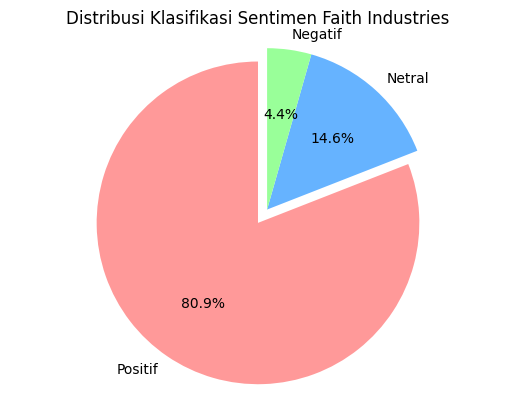

In [ ]:
# Menghitung jumlah masing-masing kategori dalam kolom 'Klasifikasi'
class_counts = dataset['Klasifikasi'].value_counts()

#kolom yang tanggapan paling banyak muncul bakal di potong
explode = [0.1 if count == class_counts.max() else 0 for count in class_counts]


# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90,explode=explode)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan judul
plt.title("Distribusi Klasifikasi Sentimen Faith Industries")

# Menampilkan plot
plt.show()

#**polaritasi teks**

* Sentimen positif: Sebanyak 40% ulasan memiliki skor polaritas 0,8 atau lebih tinggi. Hal ini menunjukkan bahwa ulasan tersebut memiliki sentimen yang sangat positif.

* Sentimen netral: Sebanyak 30% ulasan memiliki skor polaritas antara 0,2 dan 0,8. Hal ini menunjukkan bahwa ulasan tersebut memiliki sentimen yang netral atau agak positif.

* Sentimen negatif: Sebanyak 30% ulasan memiliki skor polaritas 0 atau lebih rendah. Hal ini menunjukkan bahwa ulasan tersebut memiliki sentimen yang netral atau agak negatif.

In [ ]:
dataset["polarity"] = dataset["Review_English"].map(lambda Text: TextBlob(Text).sentiment.polarity)

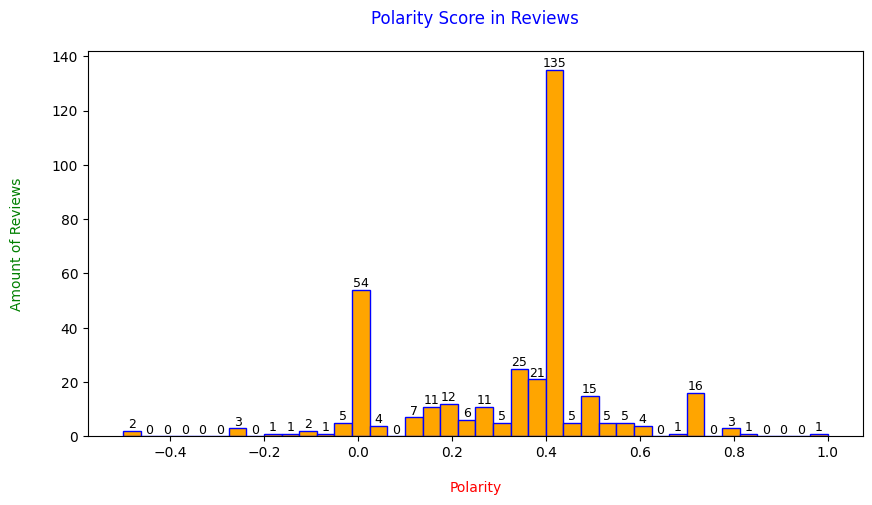

In [ ]:
ax = dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")


for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

#**Menghitung Jumlah karakter pada masing masing teks**

In [ ]:
dataset["word_counts"] = dataset["Review_English"].apply(lambda x: len(str(x).split()))

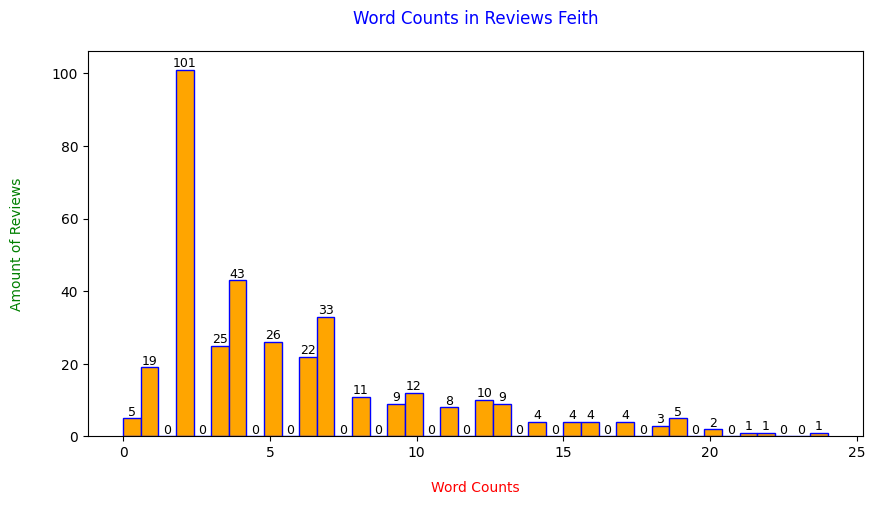

In [ ]:
ax =dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews Feith", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

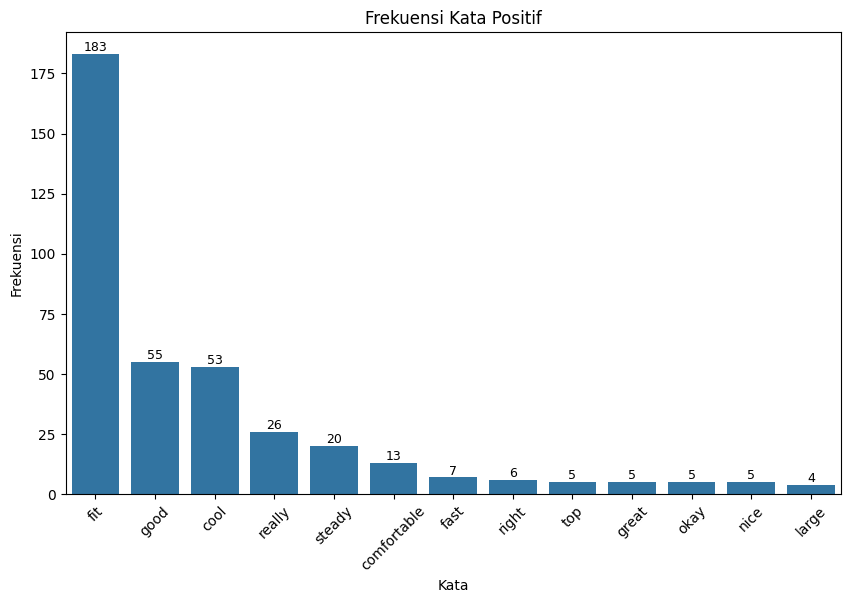

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns



# Menggabungkan semua kata positif menjadi satu list
all_positive_words = [word for sublist in dataset['Kata_Positif'] for word in sublist]

# Menghitung frekuensi setiap kata
word_counts = Counter(all_positive_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kata', y='Frekuensi', data=word_counts_df.sort_values(by='Frekuensi', ascending=False).head(13))
plt.title('Frekuensi Kata Positif')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()


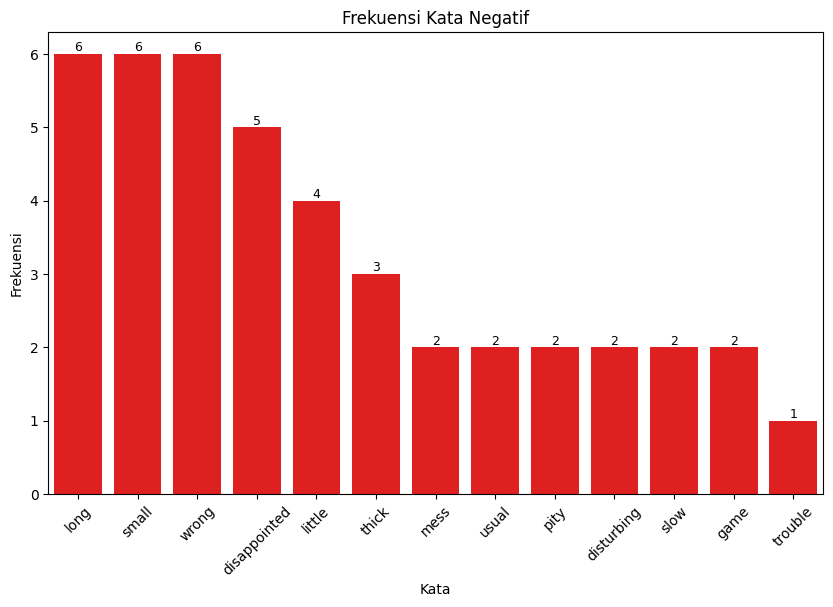

In [ ]:
# Menggabungkan semua kata positif menjadi satu list
all_negatif_words = [word for sublist in dataset['Kata_Negatif'] for word in sublist]

# Menghitung frekuensi setiap kata
word_counts = Counter(all_negatif_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(color ="red" , x='Kata', y='Frekuensi',data=word_counts_df.sort_values(by='Frekuensi', ascending=False).head(13))
plt.title('Frekuensi Kata Negatif')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)


for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

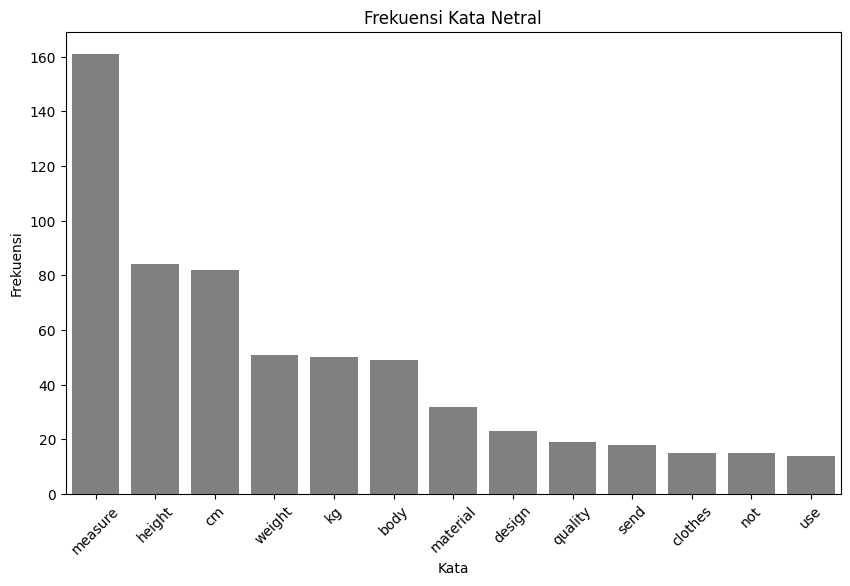

In [ ]:
# Menggabungkan semua kata positif menjadi satu list
all_netral_words = [word for sublist in dataset['Kata_Netral'] for word in sublist]

# Menghitung frekuensi setiap kata
word_counts = Counter(all_netral_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(color ="gray" , x='Kata', y='Frekuensi',data=word_counts_df.sort_values(by='Frekuensi', ascending=False).head(13))
plt.title('Frekuensi Kata Netral')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

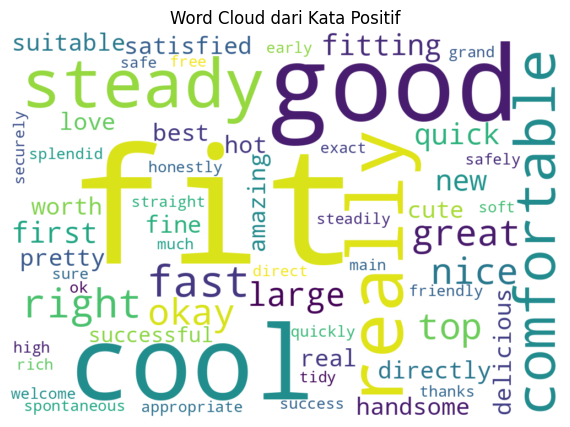

In [ ]:
# Menggabungkan semua kata positif menjadi satu string
all_positive_words = ' '.join([' '.join(sublist) for sublist in dataset['Kata_Positif']])

# Membuat word cloud
wordcloud = WordCloud(width=1000, height=700, background_color='white').generate(all_positive_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata Positif')
plt.show()

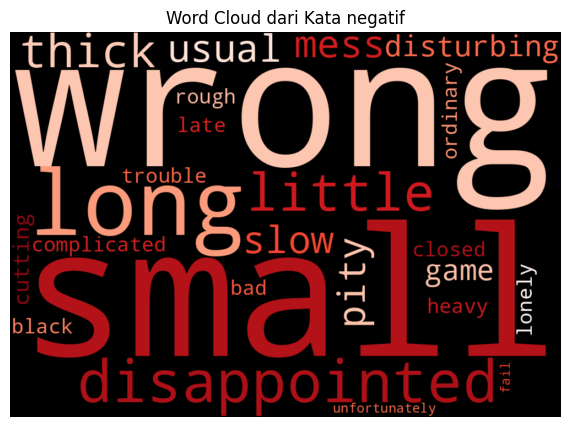

In [ ]:
# Menggabungkan semua kata positif menjadi satu string
all_positive_words = ' '.join([' '.join(sublist) for sublist in dataset['Kata_Negatif']])

# Membuat word cloud
wordcloud = WordCloud(width=1000, height=700, background_color='black',colormap='Reds').generate(all_positive_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata negatif')
plt.show()

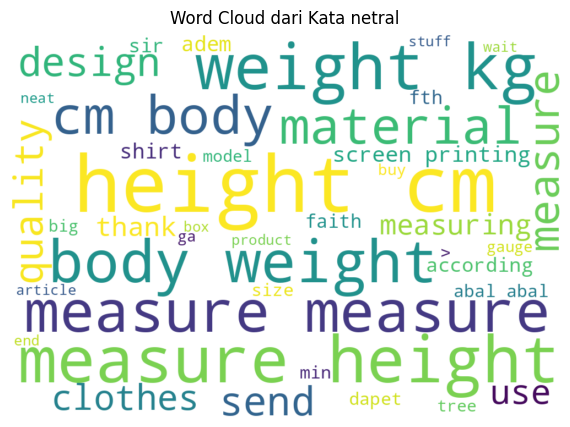

In [ ]:
# Menggabungkan semua kata netral menjadi satu string
all_positive_words = ' '.join([' '.join(sublist) for sublist in dataset['Kata_Netral']])

# Membuat word cloud
wordcloud = WordCloud(max_words = 40,width=1000, height=700, background_color='white').generate(all_positive_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata netral')
plt.show()

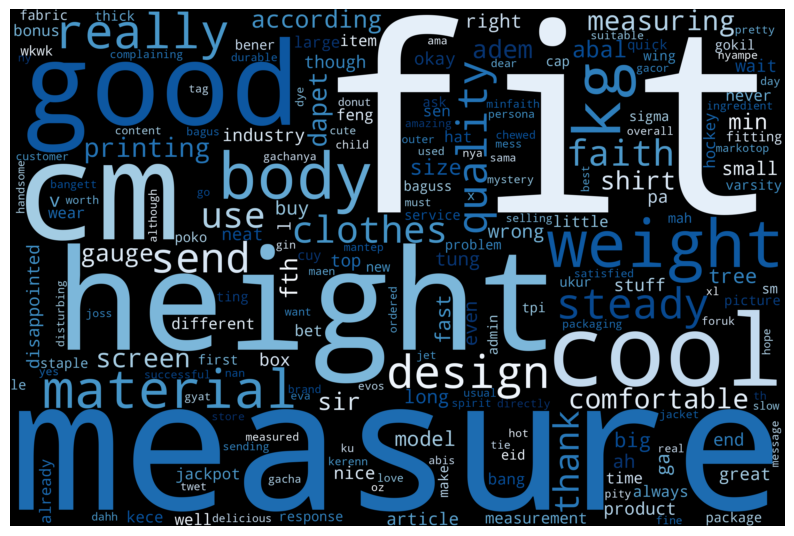

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([review for review in dataset['Review_English']])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color = 'black',
    colormap = 'Blues_r',
    collocations = False
).generate(all_words)

plot_cloud(wordcloud)

In [ ]:
dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi,polarity,word_counts
0,keren tie dye nya,cool tie dye,"[Positif, Netral, Netral]",[cool],[],"[tie, dye]",Positif,0.3500,3
1,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif,0.4000,2
2,ga lolos qc dikit ga ngaruh d akhir gue cuttin...,ga escape qc little ga influence end gue cutti...,"[Netral, Netral, Netral, Negatif, Netral, Netr...",[],"[little, cutting]","[ga, escape, qc, ga, influence, end, gue, aja,...",Negatif,-0.2625,13
3,cakep abis buat fams sejak lahir wajib punya ...,cute abis fams since birth must roarrrrr,"[Positif, Netral, Netral, Netral, Netral, Netr...",[cute],[],"[abis, fams, since, birth, must, roarrrrr]",Positif,0.5000,7
4,kualitas bagus tidak kecewa,good quality not disappointed,"[Positif, Netral, Netral, Negatif]",[good],[disappointed],"[quality, not]",Positif,0.5375,4
...,...,...,...,...,...,...,...,...,...
357,ukur pas berat badan 71 - 80 kg puas banget ti...,measure fit weight kg satisfied wait reina nyampe,"[Netral, Positif, Netral, Netral, Positif, Net...","[fit, satisfied]",[],"[measure, weight, kg, wait, reina, nyampe]",Positif,0.4500,8
358,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif,0.4000,2
359,mantep dah poko,mantep dah poko,"[Netral, Netral, Netral]",[],[],"[mantep, dah, poko]",Netral,0.0000,3
360,ukur pas tinggi badan 160 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]",Positif,0.4000,7


In [ ]:

dataset.to_csv('faithfinal.csv', index=False)


In [ ]:
pattern = r'\b\w*Wrong\w*\b'

reviews_with_kecil2 = dataset[
    dataset['Review_English'].str.contains(pattern, case=False)]

In [ ]:
reviews_with_kecil2[['Review','Review_English']]

,Review,Review_English
23,sempet salah kirim tapi adminnya sabar banget ...,send wrong admin patient helpin back best meas...
28,mantap minfaith bener2 buat konsumen nga perna...,steady minfaith bener consumer nga perna disap...
40,walaupun komplain soal salah kirim gw neng sam...,even though complaining sending wrong gw neng ...
51,meski salah kirim cuma min faith komunikasi ba...,even though wrong send min faith good communic...
302,datang malah unit 01 sen 02 mana sizenya salah...,even come sen unit sizenya wrong sen come l ha...
313,duhh dah bagus banget gw salah pilih ukur baj...,duhh really good chose wrong size really good ...


In [ ]:
pattern2 = r'\b\w*Small\w*\b'

reviews_with_kecil2 = dataset[
    dataset['Review_English'].str.contains(pattern2, case=False)]

In [ ]:
reviews_with_kecil2[['Review','Review_English']]

,Review,Review_English
7,ukur terlalu kecil tinggi badan 160 - 170 cm,measure small height cm
135,ukur pas ukur terlalu kecil ukur terlalu besar...,fit measure small measure large height cm body...
139,ukur pas ukur terlalu besar tinggi badan 171 -...,fit measure big height cm measure small height...
169,ukur pas ukur terlalu besar tinggi badan 160 ...,fit measure big height cm measure small height cm
304,ukur terlalu kecil ukur terlalu besar tinggi b...,measure small measure large height cm body wei...
329,baju nya keren salah ukur min kan sen xl daten...,clothes cool mi measured min right sen xl date...
